# 14章 時系列の手法を学ぼう 1

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
display(df)
display(df.info())

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


None

<Axes: xlabel='ds', ylabel='y'>

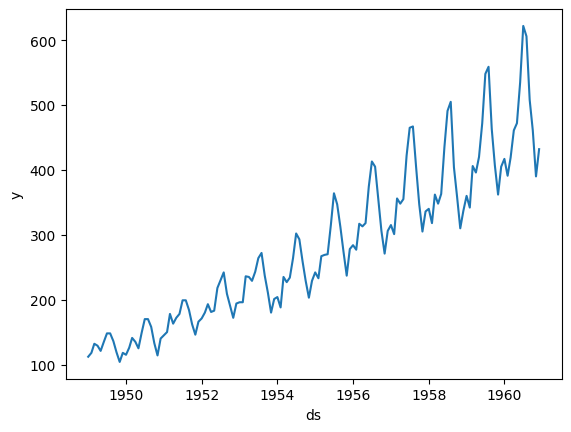

In [3]:
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])

In [4]:
from prophet import Prophet
model = Prophet()

In [5]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/ez0__h86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/becze2ce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13088', 'data', 'file=/tmp/tmpcvx5dx6c/ez0__h86.json', 'init=/tmp/tmpcvx5dx6c/becze2ce.json', 'output', 'file=/tmp/tmpcvx5dx6c/prophet_modelb92p5b21/prophet_model-20240509125102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
# 予測
future = model.make_future_dataframe(periods=36, freq='MS')
display(future)

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [7]:
forecast = model.predict(future)
display(forecast)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,58.073791,115.405865,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,50.847735,108.669542,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,81.960722,139.424570,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,79.606636,136.735909,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,81.976666,138.523128,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,583.129515,621.312821,677.271031,580.393045,586.162727,67.604288,67.604288,67.604288,67.604288,67.604288,67.604288,0.0,0.0,0.0,650.733803
176,1963-09-01,586.261164,575.660839,633.475485,583.390678,589.430531,17.222424,17.222424,17.222424,17.222424,17.222424,17.222424,0.0,0.0,0.0,603.483588
177,1963-10-01,589.291792,537.675174,596.408473,586.306164,592.601205,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,0.0,0.0,0.0,567.259613
178,1963-11-01,592.423441,508.621772,565.327253,589.266658,595.896263,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,0.0,0.0,0.0,535.439784


In [8]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,86.018883,58.073791,115.405865
1,1949-02-01,79.495226,50.847735,108.669542
2,1949-03-01,111.025581,81.960722,139.424570
3,1949-04-01,108.719017,79.606636,136.735909
4,1949-05-01,112.095281,81.976666,138.523128
...,...,...,...,...
175,1963-08-01,650.733803,621.312821,677.271031
176,1963-09-01,603.483588,575.660839,633.475485
177,1963-10-01,567.259613,537.675174,596.408473
178,1963-11-01,535.439784,508.621772,565.327253


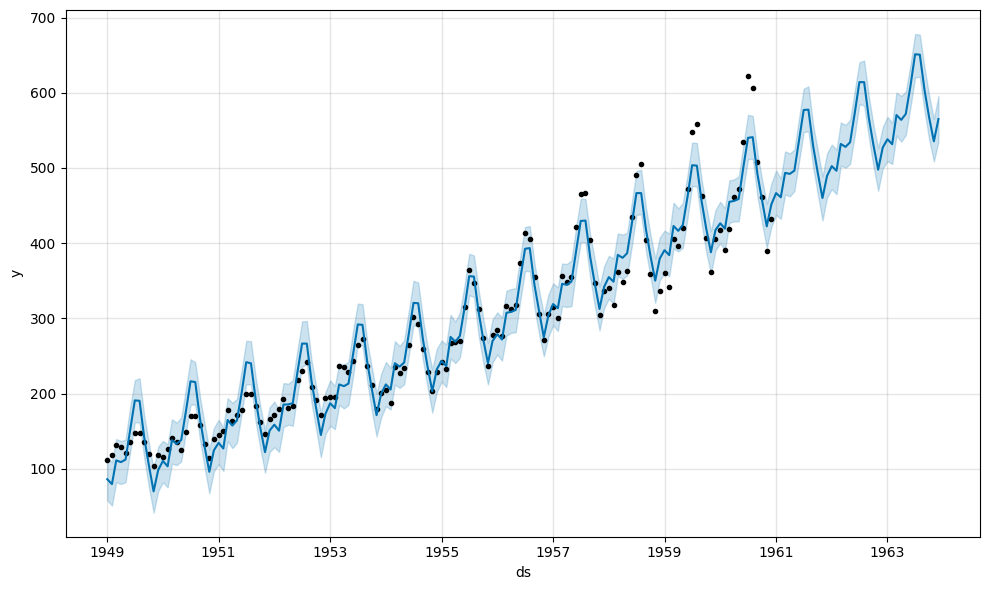

In [9]:
fig_forecast = model.plot(forecast)

In [10]:
cutoffs = pd.to_datetime(["1954-12-01", "1955-12-01", "1956-12-01", "1957-12-01"])

In [11]:
from prophet.diagnostics import cross_validation

In [12]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)

  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/6rhc529n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/9_y9s37u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3403', 'data', 'file=/tmp/tmpcvx5dx6c/6rhc529n.json', 'init=/tmp/tmpcvx5dx6c/9_y9s37u.json', 'output', 'file=/tmp/tmpcvx5dx6c/prophet_model1_trryax/prophet_model-20240509125103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/vpwbkfrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/dbx67qpx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [13]:
display(df_cv)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,237.821995,225.419233,248.723447,242,1954-12-01
1,1955-02-01,241.792078,230.018273,253.180623,233,1954-12-01
2,1955-03-01,267.141230,255.300342,279.231661,267,1954-12-01
3,1955-04-01,257.744480,247.121239,268.953215,269,1954-12-01
4,1955-05-01,261.961916,250.767151,272.773980,270,1954-12-01
...,...,...,...,...,...,...
139,1960-08-01,548.443272,526.787154,567.809256,606,1957-12-01
140,1960-09-01,511.578231,492.284698,532.543530,508,1957-12-01
141,1960-10-01,480.747994,461.039025,500.293514,461,1957-12-01
142,1960-11-01,455.417988,435.645303,476.207161,390,1957-12-01


In [14]:
from prophet.diagnostics import performance_metrics

In [15]:
df_p = performance_metrics(df_cv)
display(len(df_p))
display(df_p)

66

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,121 days,687.400156,26.218317,19.285619,0.060133,0.039788,0.057291,0.535714
1,122 days,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.571429
2,151 days,644.424799,25.385523,18.070242,0.055246,0.032945,0.052755,0.607143
3,152 days,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.642857
4,182 days,583.584697,24.157498,17.463575,0.050684,0.030947,0.050311,0.595238
...,...,...,...,...,...,...,...,...
61,1035 days,4148.980415,64.412580,52.098014,0.110759,0.107318,0.120337,0.285714
62,1065 days,3771.056315,61.408927,49.810403,0.109563,0.107318,0.116896,0.285714
63,1066 days,2708.573163,52.043954,41.785627,0.103413,0.093133,0.106282,0.285714
64,1095 days,2247.185783,47.404491,38.615136,0.098626,0.093133,0.099728,0.285714


In [16]:
df_p = performance_metrics(df_cv, monthly=True)
display(len(df_p))
display(df_p)

33

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.571429
1,5,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.642857
2,6,676.263707,26.005071,19.591839,0.056243,0.030947,0.056366,0.535714
3,7,1338.378492,36.583856,29.852167,0.078469,0.091159,0.081789,0.357143
4,8,1849.989022,43.011499,38.904615,0.097044,0.107401,0.102882,0.178571
5,9,1828.332170,42.759001,39.878294,0.099548,0.093691,0.105376,0.035714
6,10,1427.414140,37.781135,33.893169,0.087317,0.081557,0.090868,0.142857
7,11,1071.971619,32.740978,27.964421,0.081116,0.073060,0.080428,0.214286
8,12,1025.588423,32.024809,25.600093,0.079905,0.073060,0.076809,0.285714
9,13,1166.475435,34.153703,27.201677,0.085365,0.085783,0.081470,0.285714


<Axes: xlabel='horizon', ylabel='mse'>

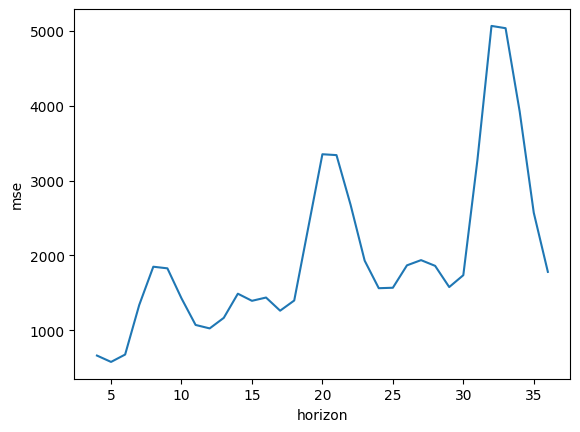

In [17]:
sns.lineplot(x="horizon", y="mse", data=df_p)

<Axes: xlabel='horizon', ylabel='coverage'>

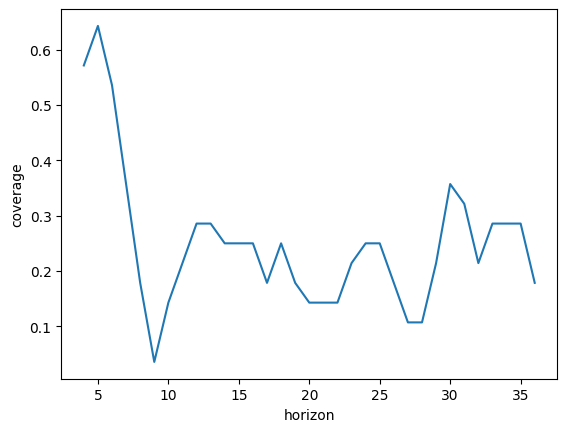

In [18]:
sns.lineplot(x='horizon', y='coverage', data=df_p)


# 15章: 前章の続き

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
display(df)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [21]:
from prophet import Prophet
# 周期性変動が徐々に拡大するモデル
model = Prophet(seasonality_mode="multiplicative")

In [22]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/0g5okpg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/te18kx2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28927', 'data', 'file=/tmp/tmpcvx5dx6c/0g5okpg0.json', 'init=/tmp/tmpcvx5dx6c/te18kx2d.json', 'output', 'file=/tmp/tmpcvx5dx6c/prophet_modelv3z00r_x/prophet_model-20240509130023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:00:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:00:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
future: pd.DataFrame = model.make_future_dataframe(periods=36, freq="MS")
display(future)

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [25]:
forecast = model.predict(future)

In [27]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,103.222279,90.232631,116.643556
1,1949-02-01,99.776094,86.273243,112.854244
2,1949-03-01,114.336052,100.222652,127.747255
3,1949-04-01,115.805724,102.491740,129.045550
4,1949-05-01,118.780781,106.120237,131.648256
...,...,...,...,...
175,1963-08-01,763.659164,743.903236,781.186739
176,1963-09-01,645.607043,628.411052,662.617825
177,1963-10-01,561.686060,545.074754,577.182186
178,1963-11-01,490.587191,474.922408,506.120957


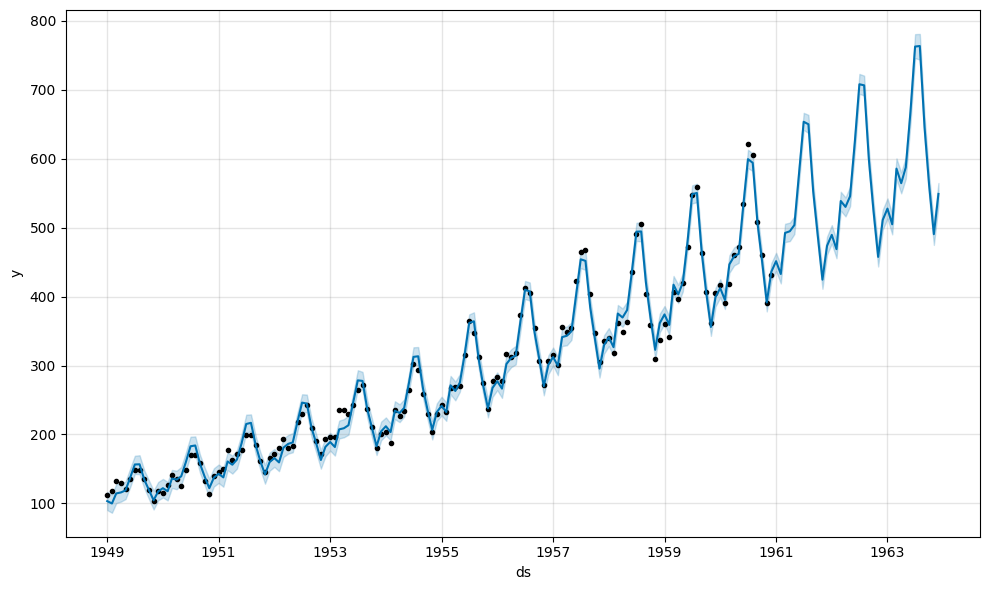

In [29]:
fig_forecast = model.plot(forecast)

In [30]:
cutoffs = pd.to_datetime(["1954-12-01", "1955-12-01", "1956-12-01", "1957-12-01"])

In [31]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/iyprv86v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/td8mw36r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74928', 'data', 'file=/tmp/tmpcvx5dx6c/iyprv86v.json', 'init=/tmp/tmpcvx5dx6c/td8mw36r.json', 'output', 'file=/tmp/tmpcvx5dx6c/prophet_model8c3xh124/prophet_model-20240509132716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:27:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:27:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/97rougea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/jwbb9g8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [32]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,516.646720,22.729864,17.276762,0.053179,0.041884,0.051366,0.250000
1,5,562.945744,23.726478,17.760393,0.053184,0.038997,0.051283,0.285714
2,6,578.952325,24.061428,18.876014,0.054900,0.038997,0.054048,0.250000
3,7,630.668183,25.113108,20.616371,0.056222,0.053416,0.056658,0.285714
4,8,568.384348,23.840813,19.098780,0.050458,0.044292,0.051838,0.357143


[(0.0, 5000.0)]

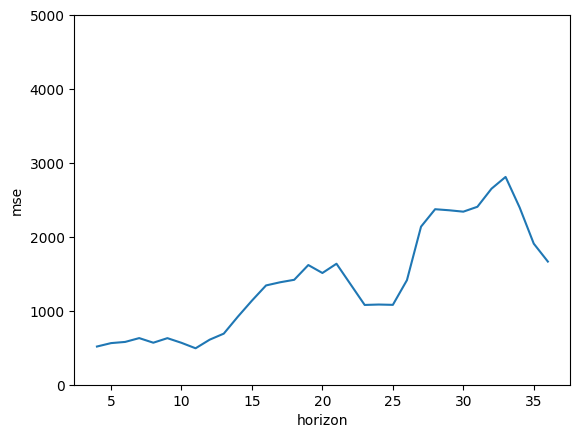

In [33]:
sns.lineplot(x='horizon', y='mse', data=df_p).set(ylim=(0, 5000))

<Axes: xlabel='horizon', ylabel='coverage'>

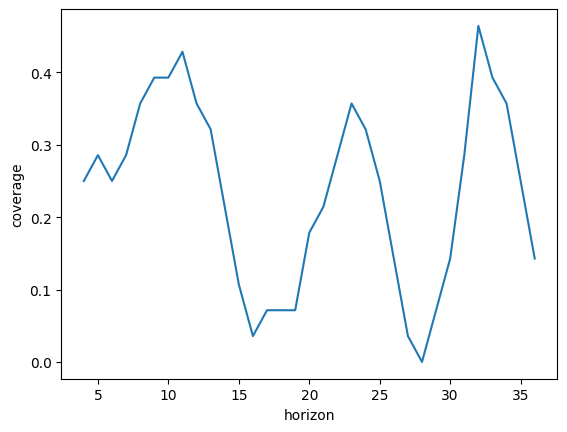

In [34]:
sns.lineplot(x='horizon', y='coverage', data=df_p)

## 補足1: 不確実性区間の幅の調整

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/78t5bkuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/6usgnepo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73780', 'data', 'file=/tmp/tmpcvx5dx6c/78t5bkuq.json', 'init=/tmp/tmpcvx5dx6c/6usgnepo.json', 'output', 'file=/tmp/tmpcvx5dx6c/prophet_modelkk__kp4q/prophet_model-20240509134202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:42:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


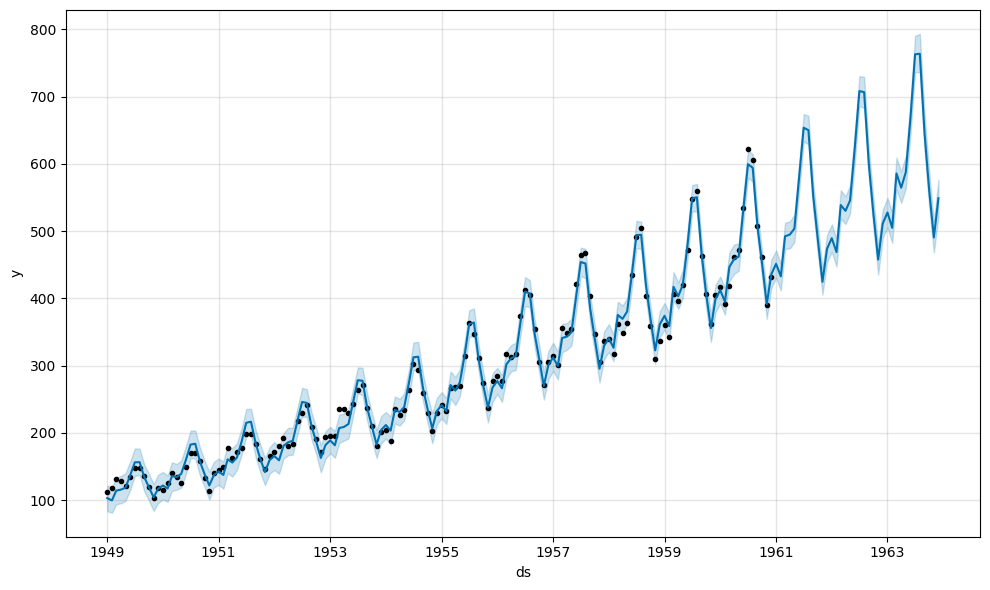

In [35]:
model = Prophet(seasonality_mode="multiplicative", interval_width=0.95)
model.fit(df)
future = model.make_future_dataframe(periods=36, freq="MS")
forecast = model.predict(future)
fig_forecast = model.plot(forecast)

In [36]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,103.222279,83.841132,121.858364
1,1949-02-01,99.776094,81.394997,119.743637
2,1949-03-01,114.336052,94.068704,134.061152
3,1949-04-01,115.805724,95.636823,136.233980
4,1949-05-01,118.780781,99.104546,140.169899
...,...,...,...,...
175,1963-08-01,763.659164,736.202581,793.130939
176,1963-09-01,645.607043,618.504993,674.387200
177,1963-10-01,561.686060,536.841675,588.656483
178,1963-11-01,490.587191,468.286927,514.573833


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/3weg3ve8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/191xrrtg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46168', 'data', 'file=/tmp/tmpcvx5dx6c/3weg3ve8.json', 'init=/tmp/tmpcvx5dx6c/191xrrtg.json', 'output', 'file=/tmp/tmpcvx5dx6c/prophet_modelfib7wvr1/prophet_model-20240509134723.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:47:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/19rnyutp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvx5dx6c/1dg_48ng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

<Axes: xlabel='horizon', ylabel='coverage'>

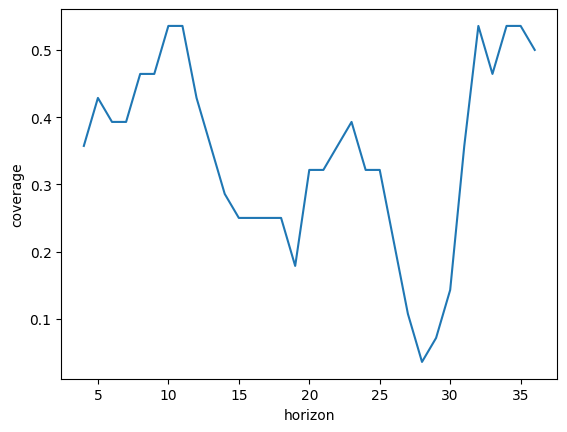

In [37]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)
df_p = performance_metrics(df_cv, monthly=True)
sns.lineplot(x='horizon', y="coverage", data=df_p)

# 補足2: 予測モデルの構成要素の確認

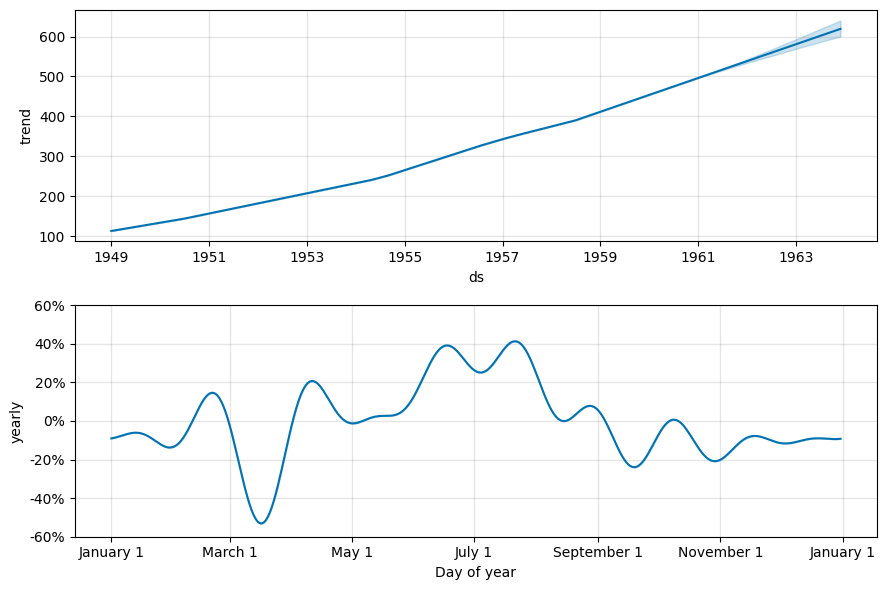

In [38]:
fig_components = model.plot_components(forecast)